## Шаг 1:
Выберите ваше любимое непрерывное распределение, чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе. Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import integrate
import math
%matplotlib inline

Арксинусное распределение - https://ru.wikipedia.org/wiki/Распределение_арксинуса
<br/> Функция распределения: 
$$F(x)=\frac{2}{\pi} arcsin(\sqrt{x}), x \in [0, 1]$$
<br/>Выборка 1000:

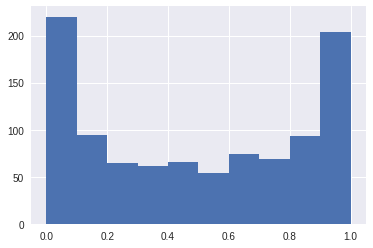

In [156]:
sample = sts.arcsine.rvs(size = 1000)
plt.hist(sample)
plt.show()

Плотность распределения:
$$f(x) = \frac{1}{\pi  \sqrt{x(1-x)}}, x \in [0, 1]$$

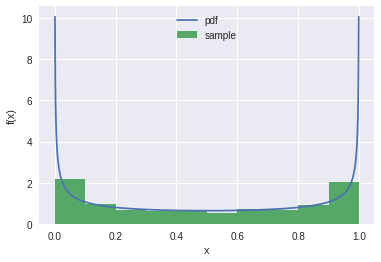

In [160]:
x = np.linspace(0.001, 0.999, 1000)
pdf = sts.arcsine.pdf(x)
plt.plot(x, pdf, label = 'pdf')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.hist(sample, normed=True, label = 'sample')
plt.legend(loc = 'upper center')
plt.show()

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.

In [0]:
# функция генерирования 1000 средних и дисперсий из выборок размера n
def Generate_means_and_variance(n, count):
  result = []
  variances = np.array([])
  for i in range(count):
    sample = sts.arcsine.rvs(size = n)
    mean = sum(sample) / n
    for i_sample in range(n):
      variances =  np.append(variances, (sample[i_sample] - mean) ** 2)
    variance = sum(variances) / n
    result.append([mean, variance])
  return np.array(result)

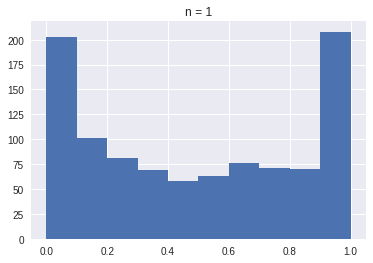

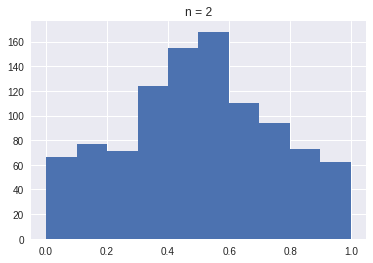

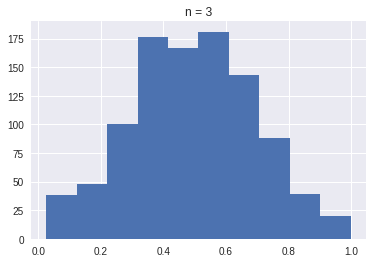

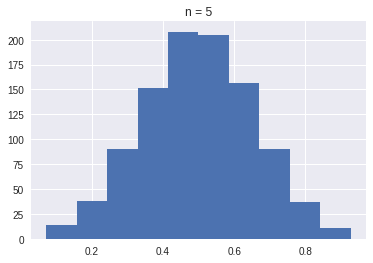

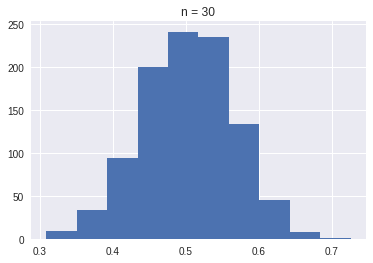

In [180]:
samples_params = Generate_means_and_variance(1, 1000)
plt.hist(samples_params[:, 0])
plt.title('n = 1')
plt.show()

samples_params = Generate_means_and_variance(2, 1000)
plt.hist(samples_params[:, 0])
plt.title('n = 2')
plt.show()

samples_params = Generate_means_and_variance(3, 1000)
plt.hist(samples_params[:, 0])
plt.title('n = 3')
plt.show()

samples_params = Generate_means_and_variance(5, 1000)
plt.hist(samples_params[:, 0])
plt.title('n = 5')
plt.show()

samples_params = Generate_means_and_variance(30, 1000)
plt.hist(samples_params[:, 0])
plt.title('n = 30')
plt.show()

Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

Матожидание - начальный момент 1 порядка - https://ru.wikipedia.org/wiki/Моменты_случайной_величины#Геометрический_смысл_некоторых_моментов
вычисляем по формуле:
$$\int_0^1{xf(x)dx}$$
по формуле, итеграл берется от $-\infty$ до $\infty$ , но для $x \notin [0, 1]\; f(x) = 0$ 

In [151]:
f_mul_x = lambda x: x / (math.pi * math.sqrt(x * (1 - x)))
first_raw_moment = integrate.quad(f_mul_x, 0, 1)
E = first_raw_moment[0] # вторая величина - точность интегрирования
print 'E = ' + str(E)

E = 0.5


Дисперсия - центральный момент 2 порядка:
$$\int_0^1{x^2 f(x)dx - E^2} $$

In [152]:
f_mul_x2 = lambda x: x ** 2 / (math.pi * math.sqrt(x * (1 - x)))
second_raw_moment = integrate.quad(f_mul_x2, 0, 1) 
second_central_moment = second_raw_moment[0] - E ** 2 # вторая величина - точность интегрирования
D = second_central_moment
print 'D = ' + str(round(D, 3))

D = 0.125


Функция нормального распределения с дисперсией $\frac{D}{n}$ и мат.ожиданием E:

In [0]:
def calc_norm_pdf(x, n):
  stand_deviation = math.sqrt(D / n)
  approximate_norm = sts.norm(E, stand_deviation)
  return approximate_norm.pdf(x)

Функция отрисовки:


In [0]:
def plot_pdf_and_sample(n, count):
  x = np.linspace(0.001, 0.999, 1000)
  samples_params = Generate_means_and_variance(n, count)
  pdf = calc_norm_pdf(x, n)
  plt.plot(x, pdf, label = 'norm_pdf')
  plt.hist(samples_params[:, 0], normed = True)
  plt.legend(loc = 'upper center')
  plt.title('n = ' + str(n) + ', count = ' + str(count) + ':')
  plt.show()

n выборок по 100 элементов

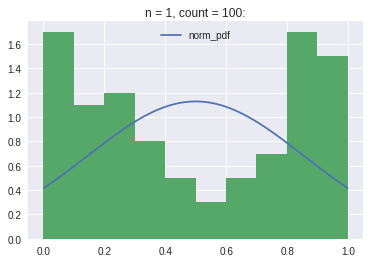

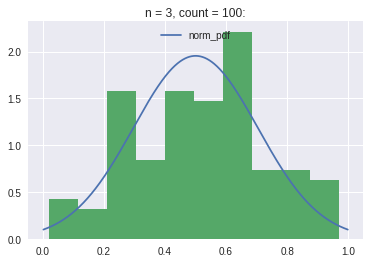

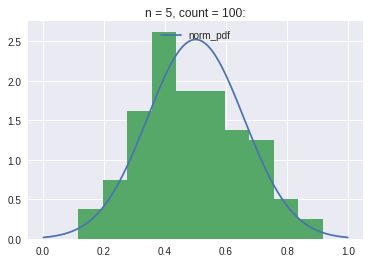

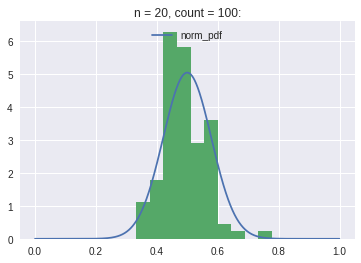

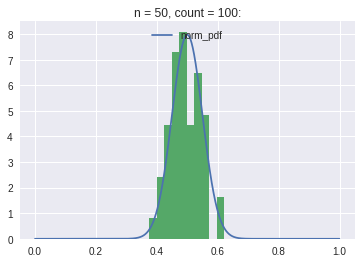

In [197]:
plot_pdf_and_sample(1, 100)  
plot_pdf_and_sample(3, 100)  
plot_pdf_and_sample(5, 100)  
plot_pdf_and_sample(20, 100)  
plot_pdf_and_sample(50, 100)  

n выборок по 1000 элементов

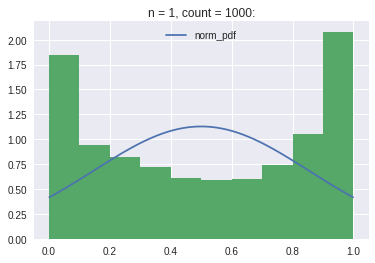

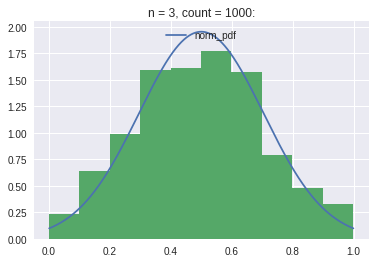

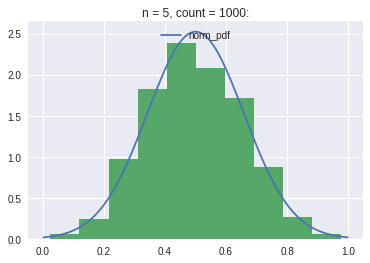

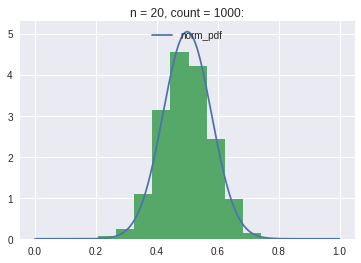

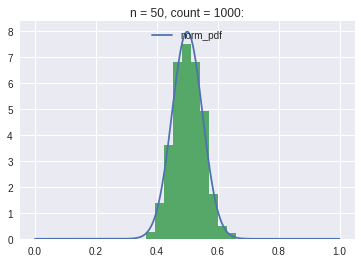

In [190]:
plot_pdf_and_sample(1, 1000)  
plot_pdf_and_sample(3, 1000)  
plot_pdf_and_sample(5, 1000)  
plot_pdf_and_sample(20, 1000)  
plot_pdf_and_sample(50, 1000)  

##*Вывод:*
Распределение выборочных средних случайной величины с распределением арксинуса аппроксимируется нормальным уже при количестве 5 выборках. Величина, как и количество, влияет на скорость сходимости к "шляпе" нормального распределения. 